# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression   # added Logistic Regression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000L, 784L)
label shape: (70000L,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

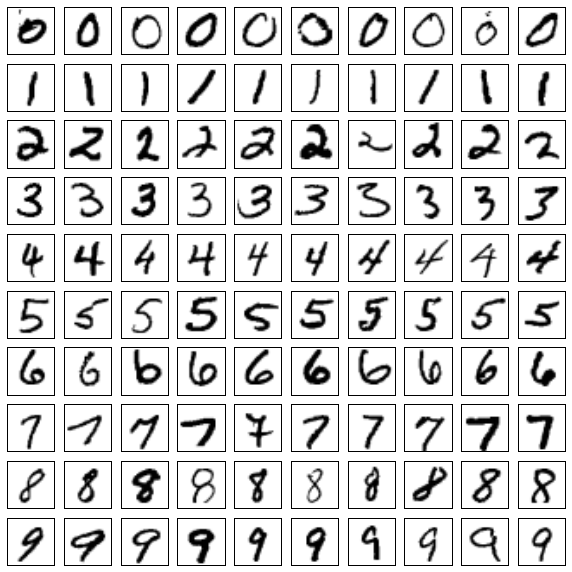

In [3]:
def P1(num_examples=10):

### STUDENT START ###
    
    ### make a dictionary with each digit as a key and num_examples number of labels as the value
    
    rand_dict = {}     #actual label dict
    marker = {}     #mark whether we found enough number of each digit
    
    while len(marker) < 10 :    # loop while we are still missing some digits
        
        # look for random numbers
        r = np.random.random_integers(0, 59999)     
        
        # if we need more of that digit put it in the dictionary, otherwise mark that digit as 'o' in the marker
        if train_labels[r] in rand_dict :     
            if len(rand_dict[train_labels[r]]) < num_examples :
                rand_dict[train_labels[r]].append(r)
            else:
                marker[train_labels[r]] = 'o'
        else :
            rand_dict[train_labels[r]] = [r]

            
    ### now plot the sample digits
    
    digplot = plt.figure(figsize=(num_examples, 10))    # prepare the figure with size of num_examples * 10
    
    for i in range(0, 10) :     # for each digit create a row of sublots
        for j in range(0, num_examples) :     #  in each row show num_examples number of sample images            
            # fig with size 10 * num_examples and place the subplots in correct position i, j
            digplot.add_subplot(10, num_examples, i*num_examples+j+1)
            
            # Since the data array is 1D, use np.reshape to convert it into a 28X28 matrix
            # changed the color map into black and white and turned off axes for a clear view
            sub1 = plt.imshow(np.reshape(train_data[rand_dict[i][j]], (28,28)), cmap = plt.cm.binary)
            
            sub1.axes.get_xaxis().set_visible(False)
            sub1.axes.get_yaxis().set_visible(False)

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):

### STUDENT START ###

    # run K-Nearest Neighbors model for each k in the k_values list
    for i in range(0, len(k_values)) :     
        # initialize and fit mini training data
        knn = KNeighborsClassifier(n_neighbors=k_values[i])
        knn.fit(mini_train_data, mini_train_labels)        
        
        # predict the dev set and calculate accuracy
        nTrue = 0.0
        
        for j in range(0, len(dev_data)) :
            if knn.predict(dev_data[j]) == dev_labels[j] :
                nTrue = nTrue + 1

        print 'Accuracy for', k_values[i], '-Nearest-Neighnors: %.1f' % (nTrue / len(dev_data)*100), '%'
    
    
    # for K = 1, report precision, recall, F1 for each label using classification report
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(mini_train_data, mini_train_labels)
    
    print "\nClassification report for k = 1"
    print classification_report(dev_labels, knn.predict(dev_data))
        
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Accuracy for 1 -Nearest-Neighnors: 88.8 %
Accuracy for 3 -Nearest-Neighnors: 87.8 %
Accuracy for 5 -Nearest-Neighnors: 86.9 %
Accuracy for 7 -Nearest-Neighnors: 86.5 %
Accuracy for 9 -Nearest-Neighnors: 86.3 %

Classification report for k = 1
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



ANSWER: According to precision in the classification report,3 is the most difficult digit.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    # make a sub training set and label according to train_sizes
    for i in range(0, len(train_sizes)) :        
        sub_train_data = train_data[:train_sizes[i]]
        sub_train_labels = train_labels[:train_sizes[i]]
        
        # build a 1-NN model with the sub training set
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(sub_train_data, sub_train_labels)        
        
        # record time for measuring elapsed time
        begin_time = time.time()
        
        # predict the dev set and calculate accuracy
        nTrue = 0.0
        
        for j in range(0, len(dev_data)) :
            if knn.predict(dev_data[j]) == dev_labels[j] :
                nTrue = nTrue + 1

        print 'Accuracy for train set size', train_sizes[i], ': %.1f' % (nTrue / len(dev_data)*100), '%, ', 'Time elapsed: %.3f' % (float(time.time()-begin_time)), 'sec'
        
        # make a list of accuracies for P4
        accuracies.append((nTrue/len(dev_data)))
    
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Accuracy for train set size 100 : 72.0 %,  Time elapsed: 0.373 sec
Accuracy for train set size 200 : 78.6 %,  Time elapsed: 0.441 sec
Accuracy for train set size 400 : 84.1 %,  Time elapsed: 0.781 sec
Accuracy for train set size 800 : 88.4 %,  Time elapsed: 1.466 sec
Accuracy for train set size 1600 : 90.2 %,  Time elapsed: 2.571 sec
Accuracy for train set size 3200 : 92.6 %,  Time elapsed: 4.948 sec
Accuracy for train set size 6400 : 93.7 %,  Time elapsed: 9.675 sec
Accuracy for train set size 12800 : 95.9 %,  Time elapsed: 18.712 sec
Accuracy for train set size 25000 : 97.0 %,  Time elapsed: 36.184 sec


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [8]:
def P4():

### STUDENT START ###
    
    # convert train_sizes list into list of vectors to use as a regression input
    train_size_mat = []
    for i in train_sizes :
        train_size_mat.append([i])
        
    # build linear regression model and fit train sizes with accuracies
    lr = LinearRegression(fit_intercept=True)
    lr.fit(train_size_mat, accuracies)

    # print the estimated fuction and the predicted accuracy for n=60000
    print '1. Linear Regression'
    print 'Estimated function: y = %.4f + %.10fx' %(lr.intercept_, lr.coef_[0])    
    print 'Predicted accuracy for n=60000: %.2f' % (lr.predict(60000) * 100), '%'
    
    
    ### Predicted accuracy for n=60000 is more than 100%, which doesn't make sense
    ### let's try if taking the log of the train size gives more realistic prediction
    log_train_sizes = []
    for i in train_sizes :
        log_train_sizes.append([np.log(i)])
        
    lr.fit(log_train_sizes, accuracies)
    print '2. Linear Regression with log(train_size)'
    print 'Predicted accuracy for n=60000: %.2f' % (lr.predict(np.log(60000)) * 100), '%'
    
    
    ### With log transformation the accuracy got less, but it's still over 100%
    ### Since the accuracy is a probability with values always in [0,1], logistic regression seems to be a better choice than linear regression
    lgr = LogisticRegression()
    lgr.fit(train_size_mat, accuracies)
    
    print '3. Logistic Regression'
    print 'Predicted accuracy for n=60000: %.2f' % ((lgr.predict(60000)) * 100), '%'
    
### STUDENT END ###

P4()

1. Linear Regression
Estimated function: y = 0.8432 + 0.0000066653x
Predicted accuracy for n=60000: 124.31 %
2. Linear Regression with log(train_size)
Predicted accuracy for n=60000: 103.39 %
3. Logistic Regression
Predicted accuracy for n=60000: 97.00 %


ANSWER: Logistic Regression gives more reasonable predictions with accuracies all in [0,1]. But the predicted accuracy for n=60000 seem to have very little improvements from n=25000

(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion Matrix:
[[ 99   0   1   0   0   1   1   0   1   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  0   0  98   0   0   0   0   1   1   0]
 [  0   0   2  83   0   0   0   0   2   0]
 [  0   0   0   0 102   0   1   0   0   0]
 [  0   0   0   1   0  88   0   0   2   0]
 [  0   0   0   0   0   0  96   0   1   0]
 [  0   0   1   0   0   0   0 111   0   0]
 [  0   0   0   1   0   1   0   0  89   0]
 [  0   0   0   1   2   1   0   1   0 106]]


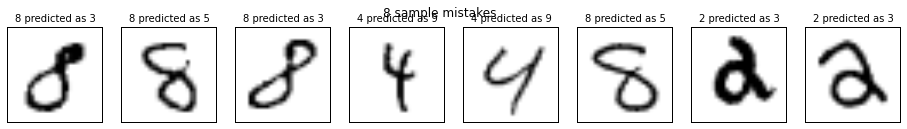

In [7]:
def P5():

### STUDENT START ###
    
    #  make predicted array and build a confusion matrix
    dev_pred = []

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(train_data, train_labels)        
        
    for i in range(0, len(dev_data)) :
        dev_pred.append(knn.predict(dev_data[i]))
    
    print 'Confusion Matrix:'
    print confusion_matrix(dev_pred, dev_labels)

    #####
    # ANSWER: Most confused pairs: (3,2), (3,8), (5,8), (9,4)
    #####
    
    # Find the confused labels
    confused = []
    
    for i in range(0, len(dev_data)) :
        if dev_pred[i] == 3 and  dev_labels[i] == 2 :
            confused.append(i)
        elif dev_pred[i] == 3 and  dev_labels[i] == 8 :
            confused.append(i)
        elif dev_pred[i] == 5 and  dev_labels[i] == 8 :
            confused.append(i)
        elif dev_pred[i] == 9 and  dev_labels[i] == 4 :
            confused.append(i)
    
    
    ### Show at most 8 samples from the list of confused labels
    num_samples = 8
    digplot = plt.figure(figsize=(num_samples*2, 2))    # prepare the figure with size of num_examples * 10
    
    samples = min(len(confused), num_samples)
    
    for i in range(0, samples) :     # for each digit create a row of sublots
        # fig with size 10 * num_examples and place the subplots in correct position i, j
        digplot.add_subplot(1, samples, i+1)
            
        # Since the data array is 1D, use np.reshape to convert it into a 28X28 matrix
        # changed the color map into black and white and turned off axes for a clear view
        sub1 = plt.imshow(np.reshape(dev_data[confused[i]], (28,28)), cmap = plt.cm.binary)
        
        plt.title('%d predicted as %d' % (dev_labels[confused[i]], dev_pred[confused[i]]), fontsize = 10)
        sub1.axes.get_xaxis().set_visible(False)
        sub1.axes.get_yaxis().set_visible(False)
    
    plt.suptitle('%d sample mistakes' % samples, fontsize = 12)
    
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [8]:
### Define a Gaussian blur function specially built for this training/test data
### input is a2D array(row = data index, column = individual data) and the number of rows and columns in the intended matrix
### output is the blurred 2D array

def g_blur(X, r, c) :
    
    # if the 1D array can't be reshaped into 2D array of r rows * c columns, return false
    if X.shape[1] != r*c :
        return False
    
    Y = np.ndarray(shape=X.shape)
    
    for k in range(0, X.shape[0]) :   # for all data
        # reshape the 1D array input in to a r * c 2D array
        M = np.reshape(X[k], (r, c))
        
        # Gaussian Blur
        for i in range(0, r) :
            for j in range(0, c) :
                if i == 0 and j == 0 :    # upper-left corner
                    Y[k][i*r+j] = (M[i][j] + M[i+1][j] + M[i][j+1] + M[i+1][j+1]) / 4.0
                elif i == r-1 and j == 0 :   # bottom-left corner
                    Y[k][i*r+j] = (M[i][j] + M[i-1][j] + M[i][j+1] + M[i-1][j+1]) / 4.0
                elif i == 0 and j == c-1 :   # upper-right corner
                    Y[k][i*r+j] = (M[i][j] + M[i+1][j] + M[i][j-1] + M[i+1][j-1]) / 4.0
                elif i == r-1 and j == c-1 :   # bottom-right corner
                    Y[k][i*r+j] = (M[i][j] + M[i-1][j] + M[i][j-1] + M[i-1][j-1]) / 4.0
                elif i == 0 :    # upper row
                    Y[k][i*r+j] = (M[i][j] + M[i][j-1] + M[i+1][j-1] + M[i+1][j] + M[i+1][j+1] + M[i][j+1]) / 6.0
                elif i == r-1 :   # bottom row
                    Y[k][i*r+j] = (M[i][j] + M[i][j-1] + M[i-1][j-1] + M[i-1][j] + M[i-1][j+1] + M[i][j+1]) / 6.0
                elif j == 0 :   # left column
                    Y[k][i*r+j] = (M[i][j] + M[i-1][j] + M[i-1][j+1] + M[i][j+1] + M[i+1][j+1] + M[i+1][j+1]) / 6.0
                elif j == c-1 :   # right column
                    Y[k][i*r+j] = (M[i][j] + M[i-1][j] + M[i-1][j-1] + M[i][j-1] + M[i+1][j-1] + M[i+1][j]) / 6.0
                else :   # all else in the middle
                    Y[k][i*r+j] = (M[i-1][j-1] + M[i][j-1] + M[i+1][j-1] + M[i-1][j] + M[i][j] + M[i+1][j] + M[i-1][j+1] + M[i][j+1] + M[i+1][j+1]) / 9.0
    
    return Y   # return the blurred 2D array

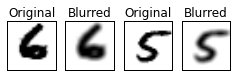

In [9]:
### This function tests whether the g_blur function works correctly
### Shows 'num' number of original and blurred random sample digit

def blur_test(num):

    blur_mini = g_blur(mini_train_data, 28, 28)   # blur the mini train set
    
    digplot = plt.figure(figsize=(num*2, 4))   
    
    for i in range(0, num) :   # show num number of original and blurred pairs chosen randomly
        r = np.random.random_integers(0, 999)
        
        digplot.add_subplot(1, num*2, i*2+1)
        sub1 = plt.imshow(np.reshape(mini_train_data[r], (28,28)), cmap = plt.cm.binary)
        plt.title('Original', fontsize = 12)
            
        sub1.axes.get_xaxis().set_visible(False)
        sub1.axes.get_yaxis().set_visible(False)
    
        digplot.add_subplot(1, num*2, i*2+2)
        sub2 = plt.imshow(np.reshape(blur_mini[r], (28,28)), cmap = plt.cm.binary)
        plt.title('Blurred', fontsize = 12)
    
        sub2.axes.get_xaxis().set_visible(False)
        sub2.axes.get_yaxis().set_visible(False)

### STUDENT END ###

blur_test(2)

In [25]:
def P6():
    
### STUDENT START ###

    # First, prepare preprocessed train and dev data set using g_blur() defined above

    proc_train = g_blur(train_data, 28, 28)
    proc_dev = g_blur(dev_data, 28, 28)
    
    knn = KNeighborsClassifier(n_neighbors=1)


    ### 1. preprocess the training data but not the dev data
    knn.fit(proc_train, train_labels)
                        
    acc = 0
    for i in range(0, len(dev_data)) :
        if knn.predict(dev_data[i]) == dev_labels[i] :
            acc = acc + 1
    
    print 'Accuracy for preprocessed training data and raw dev data : %.2f' % (float(acc) / len(dev_data) * 100), '%'
         
                        
    ### 2. preprocess the dev data but not the training data
    knn.fit(train_data, train_labels)
                        
    acc = 0
    for i in range(0, len(proc_dev)) :
        if knn.predict(proc_dev[i]) == dev_labels[i] :
            acc = acc + 1
    
    print 'Accuracy for raw training data and preprocessed dev data : %.2f' % (float(acc) / len(dev_data) * 100), '%'
                        
                        
    ### 3. preprocess both training and dev data
    knn.fit(proc_train, train_labels)
                        
    acc = 0
    for i in range(0, len(proc_dev)) :
        if knn.predict(proc_dev[i]) == dev_labels[i] :
            acc = acc + 1
    
    print 'Accuracy for preprocessed training data and preprocessed dev data : %.2f' % (float(acc) / len(dev_data) * 100), '%'

### STUDENT END ###

P6()

Accuracy for preprocessed training data and raw dev data : 98.20 %
Accuracy for raw training data and preprocessed dev data : 96.20 %
Accuracy for preprocessed training data and preprocessed dev data : 97.90 %


ANSWER: Before blurring the accuracy was 97.0%, so blur improved the accuracy. Among the three, preprocessed training with raw dev data gives the best results and actually if we don't blur the training set and blur the test set, accuracy gets worse.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [7]:
### Define a function that maps pixel values to (0, 1) or (0, 1, 2) based on 'option' parameter
### input is a 2D array(row = data index, column = individual data), output also is a 2D array with binary or 3-scale pixel

def pixel_map(X, option = 'b', th = 0.5) :
    
    # if opt is not b(binarize) or m(multi-class) return false
    if (option != 'b') and (option != 'm') :
        return False
    
    Y = np.ndarray(shape=X.shape)
    
    for i in range(0, X.shape[0]) :
        for j in range(0, X.shape[1]) :
            if option == 'b' :
                if X[i][j] < th :
                    Y[i][j] = 0
                else:
                    Y[i][j] = 1
            elif option == 'm' :
                if X[i][j] == 0 :
                    Y[i][j] = 0
                elif X[i][j] == 1 :
                    Y[i][j] = 2
                else :
                    Y[i][j] = 1
                    
    return Y

# define binarized and 3-scaled train and dev data as a global variable
bin_train_data = pixel_map(train_data)
bin_dev_data = pixel_map(dev_data)
bin_test_data = pixel_map(test_data)

mc_train_data = pixel_map(train_data, option = 'm')
mc_dev_data = pixel_map(dev_data, option = 'm')

In [10]:
def P7():

### STUDENT START ###
    
    # Binary Naive Bayes
    clf = BernoulliNB()
    clf.fit(bin_train_data, train_labels)

    print 'Binary Naive Bayes accuracy: %3.2f' % (clf.score(bin_dev_data, dev_labels)*100), '%'
    
    
    # Multi-class Naive Bayes
    mclf = MultinomialNB()
    mclf.fit(mc_train_data, train_labels)

    print 'Multi-class Naive Bayes accuracy: %3.2f' % (mclf.score(mc_dev_data, dev_labels)*100), '%'
    
### STUDENT END ###

P7()

Binary Naive Bayes accuracy: 84.50 %
Multi-class Naive Bayes accuracy: 80.80 %


ANSWER: Binary Naive Bayes gives better prediction than the multi-class Naive Bayes. The binary NB only cares whether the pixel is blank or not, but the multi-class NB also considers whether that cell is black or grey. We can imagine if an image is subtle off the center or rotated a bit from other images, 'whether black or grey' will be affected more than 'whether blank or not'. So in this case binary version works better.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [6]:
def P8(alphas):

### STUDENT START ###

    # Run GridSearch on BernoulliNB with alphas as parameter
    clf = GridSearchCV(BernoulliNB(), alphas)

    clf.fit(bin_train_data, train_labels)
    
    return clf
    
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print nb.best_params_

{'alpha': 0.0001}


In [9]:
### best value for alpha is 0.0001

### this function compares accuracy for alpha = 0 with alpha = 0.0001
def compare_alpha() :
    
    # alpha = 0
    alpha0_clf = BernoulliNB(alpha = 0)
    alpha0_clf.fit(bin_train_data, train_labels)
    print 'accuracy with alpha = 0 : %3.2f' % (alpha0_clf.score(bin_dev_data, dev_labels)*100), '%'
    
    # alpha = 0.0001
    alpha0001_clf = BernoulliNB(alpha = 0.0001)
    alpha0001_clf.fit(bin_train_data, train_labels)
    print 'accuracy with alpha = 0.0001 : %3.2f' % (alpha0001_clf.score(bin_dev_data, dev_labels)*100), '%'

compare_alpha()

accuracy with alpha = 0 : 9.90 %
accuracy with alpha = 0.0001 : 85.00 %


ANSWER: Alpha = 0.0001 has the highest accuracy of 85%. Alpha = 1.0(default) had 84.5% accuracy(see P7) and alpha = 0 has very low accuracy of 9.9%. Since $\displaystyle LIN_alpha P(X|Y)  = alpha P(X|Y) + (1-alpha) P(X)$, if we set alpha = 0, we completely ignore P(X|Y) and only look at P(X), so it is only considering the probability of pixels being black regardless of what digit they are supposed to be. So when alpha = 0 accuracy should be close to a random guess of choosing one from ten digits, which is 10%. So accuracy of 9.9% is very close to what is expected.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [12]:
def P9():

### STUDENT END ###
    # Gaussian Naive Bayes doesn't require any preprocessing
    
    # Gaussian Naive Bayes
    clf = GaussianNB()
    clf.fit(train_data, train_labels)

    print 'Gaussian Naive Bayes accuracy: %3.2f' % (clf.score(dev_data, dev_labels)*100), '%'

    print clf.theta_
    print clf.sigma_
    
### STUDENT END ###

P9()

Gaussian Naive Bayes accuracy: 57.70 %
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[  1.00000000e-09   1.00000000e-09   1.00000000e-09 ...,   1.00000000e-09
    1.00000000e-09   1.00000000e-09]
 [  1.00000000e-09   1.00000000e-09   1.00000000e-09 ...,   1.00000000e-09
    1.00000000e-09   1.00000000e-09]
 [  1.00000000e-09   1.00000000e-09   1.00000000e-09 ...,   1.00000000e-09
    1.00000000e-09   1.00000000e-09]
 ..., 
 [  1.00000000e-09   1.00000000e-09   1.00000000e-09 ...,   1.00000000e-09
    1.00000000e-09   1.00000000e-09]
 [  1.00000000e-09   1.00000000e-09   1.00000000e-09 ...,   1.00000000e-09
    1.00000000e-09   1.00000000e-09]
 [  1.00000000e-09   1.00000000e-09   1.00000000e-09 ...,   1.00000000e-09
    1.00000000e-09   1.00000000e-09]]


ANSWER: Gaussian NB does have very low accuracy. By looking at theta_(mean of each feature per class) and sigma_(variance of each feature per class) it seems like there are mostly zeros. 

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

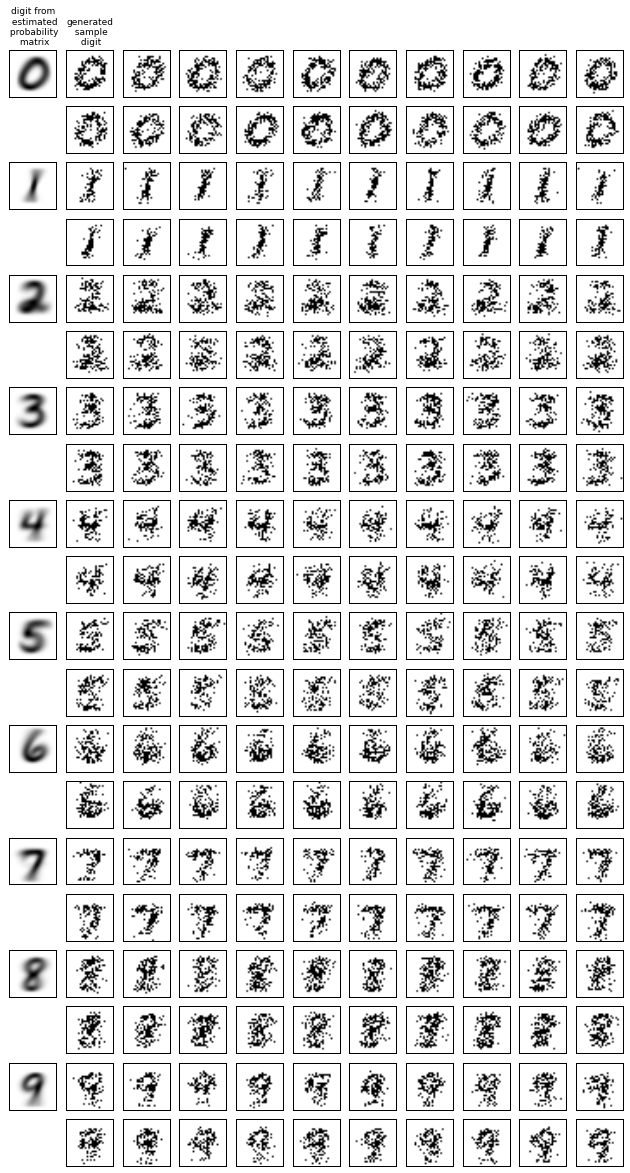

In [18]:
def P10(num_examples):

### STUDENT START ###
    
    # First fit a Binary Naive Bayes model
    clf = BernoulliNB()
    clf.fit(bin_train_data, train_labels)

    # Get the probability array from the model
    prob_array = np.exp(clf.feature_log_prob_)
    
    
    ### now generate sample digits and plot
    # I will plot the probability array itself in the first column, and then plot the generated digit in the following columns
    
    rows_per_digit = ((num_examples-1) / 10) + 1   # plot up to 10 sample digits in a row
    cols = min(num_examples+1, 11)
    
    digplot = plt.figure(figsize=(cols, 10 * rows_per_digit))
    
    for i in range(0, 10) :
        # for each digit first plot the probability array in the first column
        digplot.add_subplot(10 * rows_per_digit, cols, i * cols * rows_per_digit +1)
        sub1 = plt.imshow(np.reshape(prob_array[i], (28,28)), cmap = plt.cm.binary)
        
        sub1.axes.get_xaxis().set_visible(False)
        sub1.axes.get_yaxis().set_visible(False)
        
        if i == 0 :
            plt.title('digit from\n estimated\n probability\n matrix', fontsize = 9)
        
        for j in range(1, num_examples+1) :     #  then plot num_examples number of sample images, up to 10 samples per row
            # to geneate the sample digit, I will first make an array filled with random float between 0 and 1, picked from uniform distribution
            # if that number is below the probability of that probability plot it as black, otherwise white
            sample_digit = np.zeros(784)
            rand_array = np.random.rand(784)
                
            for k in range(0, 784) :
                sample_digit[k] = rand_array[k] < prob_array[i][k]
        
            # if num_example is more than 10, then the sample image for one digit becomes multiple rows
            # we have to keep the first column clean so this requires some calculation
            digplot.add_subplot(10 * rows_per_digit, cols, 
                                i * cols * rows_per_digit   # jump over previous digits
                                +((j-1)/10)*11+   # which row within a digit
                                ((j-1)%10)+2)   # which column
            
            # Since the data array is 1D, use np.reshape to convert it into a 28X28 matrix
            # changed the color map into black and white and turned off axes for a clear view
            sub1 = plt.imshow(np.reshape(sample_digit, (28,28)), cmap = plt.cm.binary)
            
            sub1.axes.get_xaxis().set_visible(False)
            sub1.axes.get_yaxis().set_visible(False)
            
            if i == 0  and j == 1:
                plt.title('generated\n sample\n digit', fontsize = 9)
    
    
### STUDENT END ###

P10(20)

ANSWER: Generated digits seem quite similar to the real digits, once you know if which digit it should be. If not told, some digits are more difficult to tell from each other, such as 5 and 8. And if we plot the probability array itself it really looks like a digit.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [48]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    
    # fit a binary Naive Bayes
    clf = BernoulliNB()
    clf.fit(bin_train_data, train_labels)
    
    # for each predicted data we will see if it's correct and record it in the corresponding posterior bucket
    for i in range(0, len(bin_test_data)) :
        # predict and get posterior
        pred = clf.predict(bin_test_data[i])
        prob = clf.predict_proba(bin_test_data[i])
        
        flag = 0; j = 0
        
        # check whether correct and record in the corresponding bucket
        while flag == 0 :
            if prob[0][int(pred)] <= buckets[j] :
                total[j] = total[j] + 1
                if int(pred[0]) == int(test_labels[i]) :
                    correct[j] = correct[j] + 1
                flag = 1                
            else : 
                j = j + 1
                

### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = float(correct[i]) / total[i] * 100
    print 'p(pred) <= %.13f    total = %3d    accuracy = %3.2f' %(buckets[i], total[i], accuracy), '%'

p(pred) <= 0.5000000000000    total =   5    accuracy = 40.00 %
p(pred) <= 0.9000000000000    total = 384    accuracy = 40.62 %
p(pred) <= 0.9990000000000    total = 813    accuracy = 49.20 %
p(pred) <= 0.9999900000000    total = 703    accuracy = 64.15 %
p(pred) <= 0.9999999000000    total = 730    accuracy = 72.05 %
p(pred) <= 0.9999999990000    total = 648    accuracy = 78.86 %
p(pred) <= 0.9999999999900    total = 639    accuracy = 87.95 %
p(pred) <= 0.9999999999999    total = 575    accuracy = 93.39 %
p(pred) <= 1.0000000000000    total = 4503    accuracy = 97.71 %


ANSWER: In our model the accuracy goes up as the posterior probability goes up. However, the accuracy is sill under 90% even for data with posterior probability above 0.999999999. So our model is still weakly calibrated.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

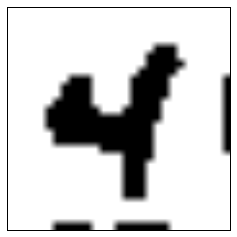

In [27]:
### Define a function that adds row-wise and column-wise distribution at the right and bottom side of the original array

### 1. Add new row/column and sum pixel values in each row and each column
### 2. Calculate the mean of added row/column
### 3. Binarize the added row/column: if the value(row/column sum) is greater than or equal to the mean, set 1, otherwise set 0
### 4. Binarize the original array: 0 if 0, otherwise 1

### input is a 2D array(row = data index, column = individual data), number of rows, number of columns
### output is a 2D array with same number of row(data index) but the column size increases from (r * c) to (r+1) * (c+1)

def rc_dist(K, r, c) :
    
    # prepare output array
    Z = np.ndarray(shape=(K.shape[0], (r+1)*(c+1)))
    
    for s in range(0, K.shape[0]) :   # for all input data,
        # temp array to work with
        X = np.reshape(K[s], (r, c))
        Y = np.ndarray((r+1, c+1))
        
        # 1. Add new row/column and sum pixel values in each row and each column
        for i in range(0, r) :
            Y[i][c]=sum(X[i])
        
        for i in range(0, c) :
            row_sum = 0
            for j in range(0, r) :
                row_sum = row_sum + X[j][i]
            Y[r][i] = row_sum
    
        # 2. Calculate the mean of added row/column
        row_sum = 0
        for i in range(0, c) :
            row_sum = row_sum + Y[r][i]
        row_mean = float(row_sum) / c
    
        col_sum = 0
        for i in range(0, r) :
            col_sum = col_sum + Y[i][c]
        col_mean = float(col_sum) / r
    
        # 3. Binarize the added row/column: if the value(row/column sum) is greater than or equal to the mean, set 1, otherwise set 0
        for i in range(0, c) :
            if Y[r][i] >= row_mean : Y[r][i] = 1
            else: Y[r][i] = 0
    
        for i in range(0, r) :
            if Y[i][c] >= col_mean : Y[i][X.shape[1]] = 1
            else: Y[i][c] = 0
    
        # 4. Binarize the original array: 0 if 0, otherwise 1
        for i in range(0, r) :
            for j in range(0, c) :
                if X[i][j] > 0 : Y[i][j] = 1
                else : Y[i][j] = 0
        
        # reshape and copy temp output array(Y) to the real output(Z)
        Z[s] = np.reshape(Y, ((r+1) * (c+1)))
            
    return Z


# define processed train and dev data as a global variable
rc_train_data = rc_dist(train_data, 28, 28)
rc_dev_data = rc_dist(dev_data, 28, 28)

# show sample plot of the process data
digplot = plt.imshow(np.reshape(rc_dev_data[100], (29,29)), cmap = plt.cm.binary)

digplot.axes.get_xaxis().set_visible(False)
digplot.axes.get_yaxis().set_visible(False)

In [28]:
def P12():

### STUDENT START ###

  # Binary Naive Bayes with train and dev data
    clf = BernoulliNB()
    clf.fit(bin_train_data, train_labels)

    print 'Binary Naive Bayes accuracy: %3.2f' % (clf.score(bin_dev_data, dev_labels)*100), '%'
    
    # Binary Naive Bayes with processed train and dev data
    clf.fit(rc_train_data, train_labels)

    print 'Binary Naive Bayes with added row/column accuracy: %3.2f' % (clf.score(rc_dev_data, dev_labels)*100), '%'

### STUDENT END ###

P12()

Binary Naive Bayes accuracy: 84.50 %
Binary Naive Bayes with Added row/column accuracy: 85.10 %


Original Naive Bayes has accuracy of 84.5%, but the Naive Bayes with processed train/dev shows improved accuracy of 85.1% (improved by 0.6%p)